###**Lenet-5 Architecture**

Importing standard libraries:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [ ]:
from tensorflow.keras.utils import to_categorical

Importing Data:

In [ ]:
mnist = tf.keras.datasets.mnist

Splitting Data into Train and Test Sets:

In [ ]:
(x_train , y_train) ,( x_test, y_test) = mnist.load_data()

In [ ]:
print("x train:", x_train.shape)
print("y train:", y_train.shape)
print("x test:", x_test.shape)
print("y test:", y_test.shape)

x train: (60000, 28, 28)
y train: (60000,)
x test: (10000, 28, 28)
y test: (10000,)


####**Preprocessing Data:**

* The Lenet-5 architecture is built to handle inputs of size 32x32
* But the MNIST dataset features images of size 28x28
* Padding is used to accomodate for this difference

In [ ]:
x_train = np.pad(x_train,((0,0),(2,2),(2,2))) 
x_test = np.pad(x_test,((0,0),(2,2),(2,2))) 

#####Normalizing values to decrease the time needed for optimizer to reach global optimum:

In [ ]:
x_train = x_train/255.0 
x_test = x_test/255.0

Converting the target variable's value into categories

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

The Lenet-5 model requires an additional dimension. So instead of inputs of size 32x32 , we require inputs of size 32x32x1 inputs.

In [ ]:
x_train=np.expand_dims(x_train,3)
x_test=np.expand_dims(x_test,3)

Train and Test Sets After Preprocessing:

In [ ]:
print("x train:", x_train.shape)
print("y train:", y_train.shape)
print("x test:", x_test.shape)
print("y test:", y_test.shape)

x train: (60000, 32, 32, 1)
y train: (60000, 10)
x test: (10000, 32, 32, 1)
y test: (10000, 10)


####**Building the Model:**

In [ ]:
model = tf.keras.Sequential(name="LeNet-5")

In [ ]:
model.add(Conv2D(6,(5,5), strides=(1,1), activation='tanh', input_shape=(32,32,1), name='convolutional_layer_1'))
model.add(MaxPooling2D(name='subsampling_layer_1'))
model.add(Conv2D(16,(5,5),strides=(1,1),activation='tanh',name='convolutional_layer_2')) 
model.add(MaxPooling2D(name='subsampling_layer_2')) 

In [ ]:
model.add(Flatten())
model.add(Dense(120,activation='tanh',name='fully_connected_layer_5')) 
model.add(Dense(84,activation='tanh',name='fully_connected_layer_6')) 
model.add(Dense(10,activation='softmax',name='output_layer')) 

Compiling and training the model:

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "LeNet-5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convolutional_layer_1 (Conv  (None, 28, 28, 6)        156       
 2D)                                                             
                                                                 
 subsampling_layer_1 (MaxPoo  (None, 14, 14, 6)        0         
 ling2D)                                                         
                                                                 
 convolutional_layer_2 (Conv  (None, 10, 10, 16)       2416      
 2D)                                                             
                                                                 
 subsampling_layer_2 (MaxPoo  (None, 5, 5, 16)         0         
 ling2D)                                                         
                                                                 
 flatten_1 (Flatten)         (None, 400)               0   

In [ ]:
history = model.fit(x_train, y_train, batch_size = 40, epochs = 15, validation_split = 0.1)

Epoch 1/15
1350/1350 [==============================] - 38s 27ms/step - loss: 0.1761 - accuracy: 0.9476 - val_loss: 0.0611 - val_accuracy: 0.9840
Epoch 2/15
1350/1350 [==============================] - 38s 28ms/step - loss: 0.0583 - accuracy: 0.9823 - val_loss: 0.0504 - val_accuracy: 0.9842
Epoch 3/15
1350/1350 [==============================] - 37s 28ms/step - loss: 0.0406 - accuracy: 0.9876 - val_loss: 0.0521 - val_accuracy: 0.9842
Epoch 4/15
1350/1350 [==============================] - 38s 28ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0438 - val_accuracy: 0.9877
Epoch 5/15
1350/1350 [==============================] - 37s 27ms/step - loss: 0.0228 - accuracy: 0.9931 - val_loss: 0.0485 - val_accuracy: 0.9872
Epoch 6/15
1350/1350 [==============================] - 36s 26ms/step - loss: 0.0184 - accuracy: 0.9946 - val_loss: 0.0459 - val_accuracy: 0.9888
Epoch 7/15
1350/1350 [==============================] - 37s 27ms/step - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.0473 -

####**Testing the model:**

* The model performs well with a high accuracy value and low loss value
* The Lenet-5 Model performs slightly better than the CNN created for the first exercise as it has a lower loss value and higher accuracy value
* This means the network predicts true positives and true negatives well
* Loss refers to the overall difference between the predicted versus actual outcome. The lower this value, the better your model performs on your data


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0402 - accuracy: 0.9900


[0.04022732004523277, 0.9900000095367432]

####**Plotting the Model's Performance:**

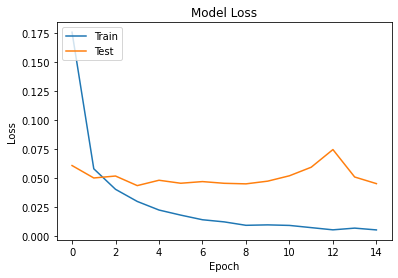

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

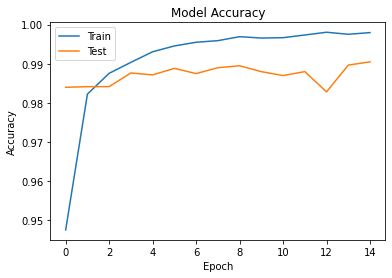

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()